## Personalice el formulario del sitio administrativo

Al registrar el modelo Question con admin.site.register (Question), Django pudo construir una representación del formulario predeterminado. A menudo, usted querrá personalizar el aspecto y el funcionamiento del formulario del sitio administrativo. Usted hará esto indicándole a Django las opciones que desee cuando registre el objeto.

Veamos cómo funciona esto reordenando los campos en el formulario de edición. Reemplace la línea admin.site.register(Question) con:

In [ ]:

# polls/admin.py

from django.contrib import admin

from .models import Question


class QuestionAdmin(admin.ModelAdmin):
    fields = ["pub_date", "question_text"]


admin.site.register(Question, QuestionAdmin)



Usted seguirá este patrón - cree una clase de modelo del sitio administrativo y luego pásela como el segundo argumento a admin.site.register() - cada vez que necesite cambiar las opciones del sitio administrativo para un modelo.

Esta modificación concreta citada anteriormente hace que la «Publication date» se anteponga al campo «Question»:

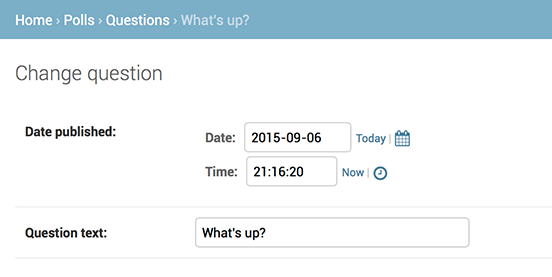

In [1]:
from IPython import display
display.Image("./admin07.png")


Esto no es tan impresionante con sólo dos campos, pero para los formularios del sitio administrativo con docenas de campos, elegir un orden intuitivo es un detalle importante de usabilidad.

Y hablando de formularios con docenas de campos, es posible que desee dividir el formulario en grupos de campos:

In [ ]:

# polls/admin.py

from django.contrib import admin

from .models import Question


class QuestionAdmin(admin.ModelAdmin):
    fieldsets = [
        (None, {"fields": ["question_text"]}),
        ("Date information", {"fields": ["pub_date"]}),
    ]


admin.site.register(Question, QuestionAdmin)



El primer elemento de cada tupla en fieldsets es el título del grupo de campos. Así es como se ve el formulario ahora:

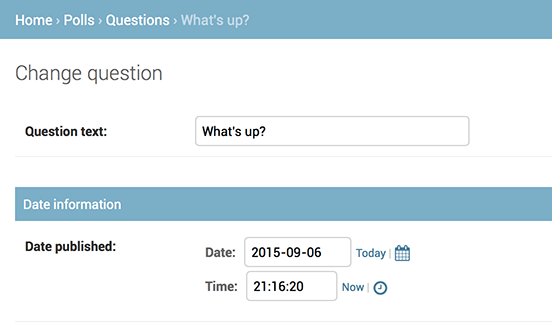

In [2]:
from IPython import display
display.Image("./admin08t.png")

## Agregando objetos relacionados

OK, tenemos nuestra página de administración Question, pero una Question tiene varias Choices, y la página de administración no muestra opciones.

Sin embargo.

Hay dos formas de resolver este problema. La primera es registrar Choice con el administrador tal como lo hicimos con Question:

In [ ]:

# polls/admin.py

from django.contrib import admin

from .models import Choice, Question

# ...
admin.site.register(Choice)



Ahora «Choices» es una opción disponible en el sitio administrativo de Django. El formulario «Add choice» se ve así:

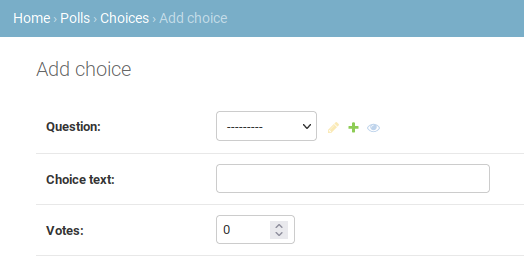

In [3]:
from IPython import display
display.Image("./admin09.png")

En ese formulario, el campo «Question» es un cuadro de selección que contiene cada pregunta de la base de datos. Django sabe que una ForeignKey debería estar representada en el sitio administrativo como un cuadro select. En nuestro caso, solo existe una pregunta en este momento.
    
Observe también el enlace "Agregar otra pregunta" junto a "Pregunta". Cada objeto con una relación ForeignKey con otro obtiene esto de forma gratuita. Al hacer clic en «Agregar otra pregunta», aparecerá una ventana emergente con el formulario «Agregar pregunta». Si agrega una pregunta en esa ventana y hace clic en «Guardar», Django guardará la pregunta en la base de datos y la agregará dinámicamente como la opción seleccionada en el formulario «Agregar opción» que está viendo.

Pero, en realidad, se trata de una forma ineficiente de añadir objetos Choice al sistema. Sería mejor si usted pudiese agregar muchas Choices directamente cuando crea el objeto Question. Hagámoslo realidad.

Elimine la llamada register() para el modelo Choice. Después, edite el código de registro de Question para que diga:

In [ ]:

# polls/admin.py

from django.contrib import admin

from .models import Choice, Question


class ChoiceInline(admin.StackedInline):
    model = Choice
    extra = 3


class QuestionAdmin(admin.ModelAdmin):
    fieldsets = [
        (None, {"fields": ["question_text"]}),
        ("Date information", {"fields": ["pub_date"], "classes": ["collapse"]}),
    ]
    inlines = [ChoiceInline]


admin.site.register(Question, QuestionAdmin)



Esto le indica a Django: «Los objetos Choice se editan en la página de administración Question. De forma predeterminada, proporciona suficientes campos para 3 opciones.»

Cargue la página «Add question» para ver cómo se ve:

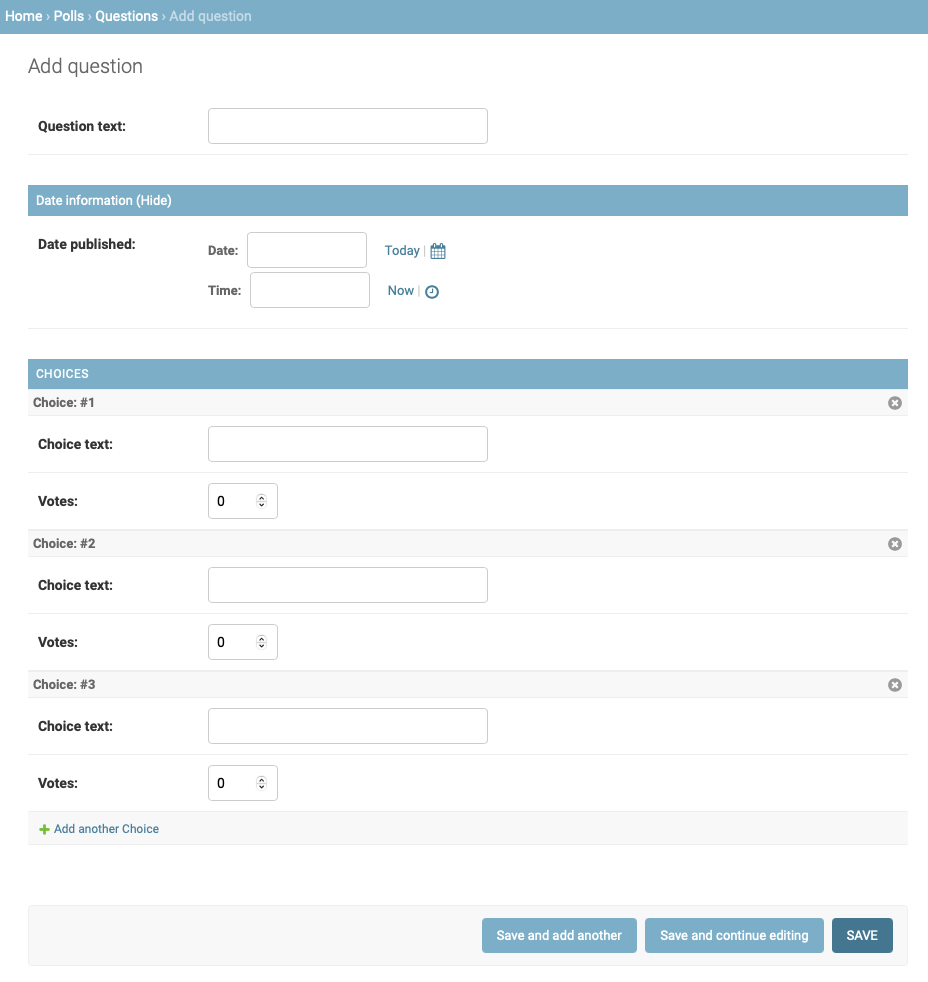

In [4]:
from IPython import display
display.Image("./admin10t.png")

Funciona así: hay tres espacios para las opciones relacionadas – como indica extra – y cada vez que usted vuelva a la página «Change» para un objeto ya creado, usted obtiene otros tres espacios adicionales.

Al final de los tres espacios actuales encontrará el enlace «Agregar otra opción». Si hace clic en él, se agregará una nueva ranura. Si desea eliminar la ranura agregada, puede hacer clic en la X en la parte superior derecha de la ranura agregada. Esta imagen muestra una ranura agregada:

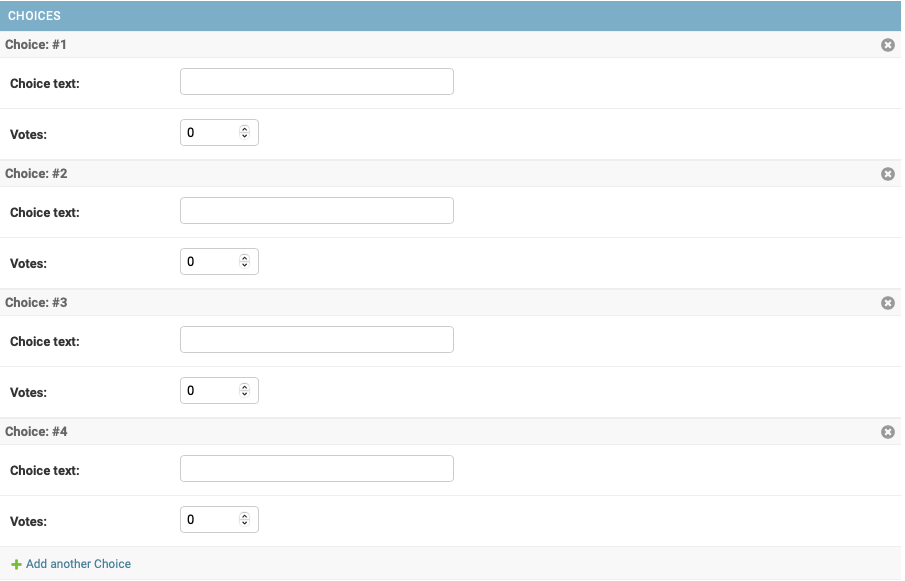

In [5]:
from IPython import display
display.Image("./admin14t.png")

Sin embargo, hay un pequeño problema. Se necesita mucho espacio en la pantalla para mostrar todos los campos para ingresar objetos Choice relacionados. Por esa razón, Django ofrece una forma tabular de mostrar objetos relacionados en línea. Para usarlo, cambie la declaración ChoiceInline para que diga:

In [ ]:

# polls/admin.py

class ChoiceInline(admin.TabularInline): ...



Los objetos relacionados se muestran en un formato más compacto basado en tablas con esa TabularInline (en lugar de StackedInline):

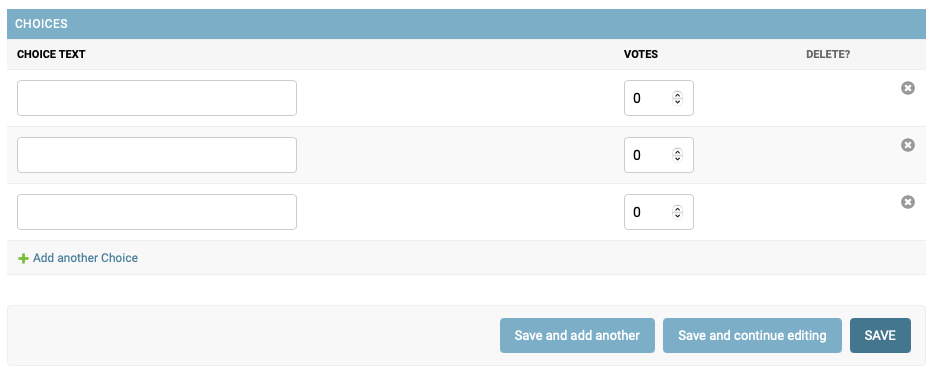

In [6]:
from IPython import display
display.Image("./admin11t.png")

Tenga en cuenta que hay un mensaje adicional «¿Eliminar?» columna que permite eliminar filas agregadas usando el botón «Agregar otra opción» y filas que ya han sido guardadas.
### Personalice la lista de cambios del sitio administrativo

Ahora que la página de administración Question se ve bien, vamos a hacer algunos ajustes a la página «change list» – la que muestra todas las preguntas en el sistema.

Así es como se ve en este momento:

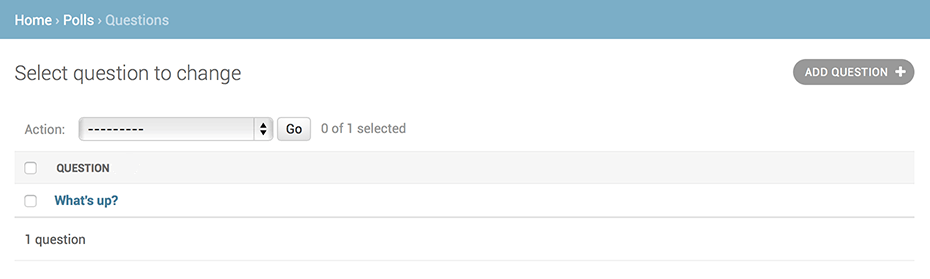

In [7]:
from IPython import display
display.Image("./admin04t.png")

Por defecto, Django muestra el str() de cada objeto. Pero a veces sería más útil si pudiéramos mostrar campos individuales. Para hacer eso, use la opción de administración list_display, que es una lista de nombres de campos para mostrar, como columnas, en la página de lista de cambios para el objeto:

In [ ]:

# polls/admin.py

class QuestionAdmin(admin.ModelAdmin):
    # ...
    list_display = ["question_text", "pub_date"]



Por si acaso, incluyamos también el método was_published_recently() del Tutorial 2:

In [ ]:

# polls/admin.py

class QuestionAdmin(admin.ModelAdmin):
    # ...
    list_display = ["question_text", "pub_date", "was_published_recently"]



Ahora la página de lista de cambios de preguntas se ve así:

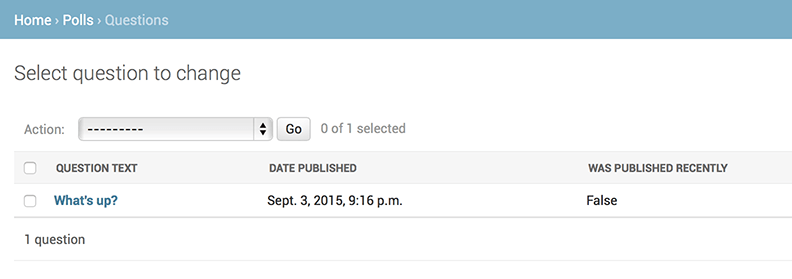

In [8]:
from IPython import display
display.Image("./admin12t.png")

Usted puede hacer clic en las cabeceras de las columnas para ordenar por esos valores ,excepto en el caso de la cabecera was_published_recently, porque ordenar por la salida de un método arbitrario no está soportado. También tenga en cuenta que la cabecera de la columna was_published_recently es, por defecto, el nombre del método (con guiones bajos reemplazado con espacios), y que cada línea contiene la representación de cadena de la salida.

Puedes mejorar eso usando el decorador display() en ese método (en polls/models.py), de la siguiente manera:

In [ ]:

# polls/models.py

from django.contrib import admin


class Question(models.Model):
    # ...
    @admin.display(
        boolean=True,
        ordering="pub_date",
        description="Published recently?",
    )
    def was_published_recently(self):
        now = timezone.now()
        return now - datetime.timedelta(days=1) <= self.pub_date <= now



Para obtener más información sobre las propiedades configurables a través del decorador, consulte list_display.

Edite de nuevo su archivo polls/admin.py y añada una mejora a la página Question en la lista de cambios: filtre utilizando el list_filter. Agregue la siguiente línea a QuestionAdmin:

Eso añade una barra lateral «Filter» que le permite a los usuarios filtrar la lista de cambios mediante el campo pub_date:

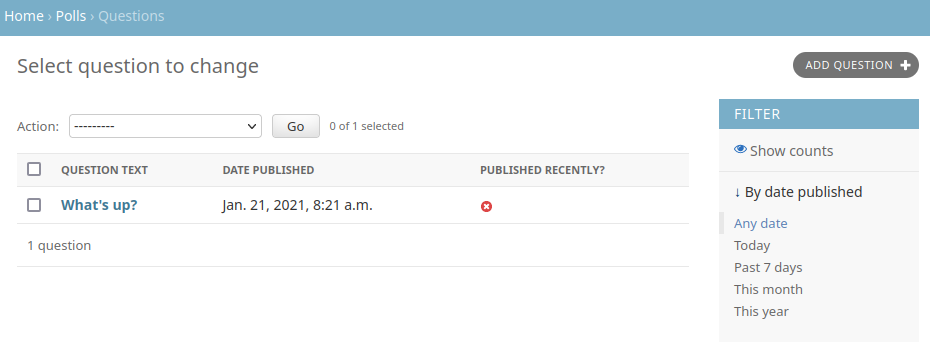

In [9]:
from IPython import display
display.Image("./admin13t.png")

El tipo de filtro que se muestra depende del tipo de campo que está filtrando. Debido a que la pub_date es una DateTimeField, Django sabe dar opciones de filtro apropiadas: «Any date», «Today», «Past 7 days», «This month», «This year».

Esto se perfila bien. Vamos a añadir un poco de capacidad de búsqueda:

Eso añade un cuadro de búsqueda en la parte superior de la lista de cambios. Cuando alguien introduce los términos de búsqueda, Django buscará el campo question_text. Usted puede utilizar tantos campos como desee, sin embargo, ya que utiliza una petición LIKE detrás de bastidores, limitar el número de campos de búsqueda a un número razonable le facilitará la búsqueda a su base de datos.

Ahora también es un buen momento para señalar que las listas de cambios le dan paginación libre. El modo predeterminado muestra 100 items por página. Paginación de la lista de cambios, cuadros de búsqueda, :attr:filtros, jerarquías de fecha y orden de la cabecera de columnas todos trabajan juntos como usted piensa que deberían.
## Personalice el aspecto del sitio administrativo

Está claro que tener «Django administration» en la parte superior de cada página del sitio administrativo es ridículo. Es sólo texto del marcador de posición.

Sin embargo, puedes cambiarlo usando el sistema de plantillas de Django. El administrador de Django funciona con el propio Django y sus interfaces utilizan el propio sistema de plantillas de Django.
## Personalizando las plantillas de su proyecto

Cree un directorio templates en el directorio de su proyecto (el que contiene manage.py). Las plantillas se pueden ubicar en cualquier parte de su sistema de archivos al que Django pueda acceder. (Django ejecuta como cualquier usuario ejecuta su servidor.) Sin embargo, una buena práctica a seguir es guardar sus plantillas en el proyecto.

Abra el archivo de configuraciones (mysite/settings.py, recuerde) y añada una opción DIRS en la opción TEMPLATES:

In [ ]:

# mysite/settings.py

TEMPLATES = [
    {
        "BACKEND": "django.template.backends.django.DjangoTemplates",
        "DIRS": [BASE_DIR / "templates"],
        "APP_DIRS": True,
        "OPTIONS": {
            "context_processors": [
                "django.template.context_processors.debug",
                "django.template.context_processors.request",
                "django.contrib.auth.context_processors.auth",
                "django.contrib.messages.context_processors.messages",
            ],
        },
    },
]



DIRS es una lista de directorios del sistema de archivos utilizada para comprobar cuando se cargan las plantillas de Django; es una ruta de búsqueda.

### Organizando las plantillas

Al igual que los archivos estáticos podríamos tener todas nuestras plantillas juntas en un gran directorio de plantillas y funcionaría perfectamente. Sin embargo, las plantillas que pertenecen a una determinada aplicación deberían ser puestas en el directorio de plantillas de la aplicación (por ejemplo, polls/templates) en lugar del directorio (templates) del proyecto. Hablaremos con más detalle por qué hacemos esto en el tutorial de aplicaciones reutilizables.

Ahora cree un directorio llamado admin dentro de las plantillas y copie la plantilla admin/base_site.html desde el directorio predeterminado de la plantilla de administración de Django en el código fuente del propio Django (django/contrib/admin/templates) en ese directorio.

### ¿Dónde están los archivos fuente de Django?

Si tiene dificultad para encontrar donde están localizados los archivos fuente de Django en su sistema, ejecute el siguiente comando:

Luego, edite el archivo y reemplace {{ site_header|default:_('Administración de Django') }} (incluidas las llaves) con el nombre de su propio sitio como mejor le parezca. Deberías terminar con una sección de código como:

Utilizamos este método para enseñarle cómo reemplazar las plantillas. En un proyecto real, usted probablemente utilizaría el atributo django.contrib.admin.AdminSite.site_header para hacer este ajuste particular con mayor facilidad.

Este archivo de plantillas contiene una gran cantidad de texto como {% block branding%} y {{title}}. Las etiquetas {% y {{ son parte del lenguaje de plantillas de Django. Cuando Django crea admin/base_site.html, este lenguaje de plantilla será evaluado para generar la página HTML definitiva, como vimos en el Tutorial 3.

Tenga en cuenta que cualquiera de las plantillas de administración predeterminadas de Django se puede anular. Para anular una plantilla, haga lo mismo que hizo con base_site.html: cópielo del directorio predeterminado a su directorio personalizado y realice cambios.
### Personalizando las plantillas de su aplicación

Los lectores agudos preguntarán: ¿Pero si DIRS estaba vacío por defecto, ¿Cómo Django estaba buscando las plantillas del sitio administrativo predeterminado? La respuesta es que, ya que APP_DIRS <TEMPLATES-APP_DIRS está fijado como True, Django busca automáticamente un subdirectorio templates/ dentro de cada paquete de la aplicación, para su uso como una solución alternativa (no olvide que django.contrib.admin es una aplicación).

Nuestra aplicación de encuestas no es muy compleja y no necesita las plantillas personalizadas del sitio administrativo. Pero si se hiciera más sofisticada y requiriera la modificación de las plantillas convencionales del sitio administrativo de Django para algunas de sus funciones, sería más sensato modificar las plantillas de la aplicación, en lugar de las que están en el proyecto. De esa manera, usted podría incluir la aplicación encuestas en cualquier nuevo proyecto y estaría seguro de que esta encontraría las plantillas personalizadas que necesitaba.

Consulte la documentación sobre la carga de plantillas para obtener más información sobre cómo Django encuentra sus plantillas.
### Personalice la página del índice del sitio administrativo

En este sentido, es posible que desee personalizar la apariencia de la página de índice del sitio administrativo de Django.

Por defecto, muestra todas las aplicaciones que se encuentran en INSTALLED_APPS que han sido registradas en la aplicación del sitio administrativo en orden alfabético. Es posible que desee realizar cambios significativos en el diseño. Después de todo, el índice es probablemente la página más importante del sitio administrativo y debería ser fácil de usar.

La plantilla a personalizar es admin/index.html. (Haga lo mismo que hizo con admin/base_site.html en la sección anterior: cópiela desde el directorio predeterminado en el directorio de plantillas personalizadas). Edite el archivo y verá que utiliza una variable de plantilla llamada app_list. Esa variable contiene todas las aplicaciones instaladas de Django. En lugar de utilizar esa, usted puede predeterminar enlaces a páginas del sitio administrativo específicas de objeto de la manera que le parezca mejor.